In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 6.7 MB/s eta 0:00:00


In [2]:
import control
import matplotlib.pyplot as plt

In [3]:
# Define transfer function of the system
s = control.tf('s')

# Define Transfer Functions

Examples by: https://www.mathworks.com/help/control/ug/connecting-models.html#GSConnectingModels-6

In [4]:
F = 1/(s+1)
G = 100/(s**2+5*s+100)
C = 20*(s**2+s+60)/s/(s**2+40*s+400)
S = 10/(s+10)

## Block Interconnection - Case 1

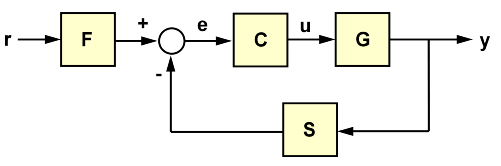

In [5]:
F = control.tf(F, inputs='r', outputs='w')

In [6]:
summer = control.summing_junction(['w', '-v'], 'e') # e = w - v

In [7]:
C = control.tf(C, inputs='e', outputs='u')

In [8]:
G = control.tf(G, inputs='u', outputs='y')

In [9]:
S = control.tf(S, inputs='y', outputs='v')

In [10]:
sys = control.interconnect([F, summer, C, G, S],
                           inputs='r', outputs='y')

In [11]:
# Simulate step response
t, y = control.step_response(sys, T=6)

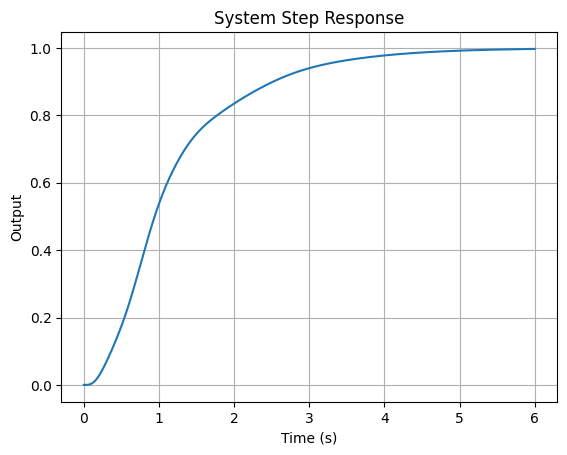

In [12]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()

## Block Interconnection - Case 2

# 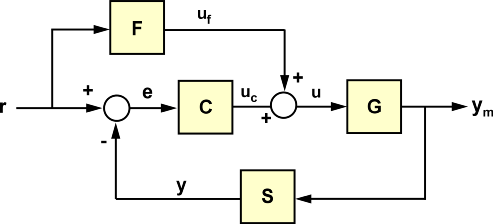

In [13]:
summer1 = control.summing_junction(['r', '-y'], 'e') # e = r - y

In [14]:
summer2 = control.summing_junction(['uf', 'uc'], 'u') # u = uf + uc

In [15]:
F = control.tf(F, inputs='r', outputs='uf')

In [16]:
C = control.tf(C, inputs='e', outputs='uc')

In [17]:
G = control.tf(G, inputs='u', outputs='ym')

In [18]:
S = control.tf(S, inputs='ym', outputs='y')

In [19]:
sys = control.interconnect([summer1, summer2, F, C, G, S],
                           inputs='r', outputs='ym')

In [20]:
# Simulate step response
t, y = control.step_response(sys, T=4.5)

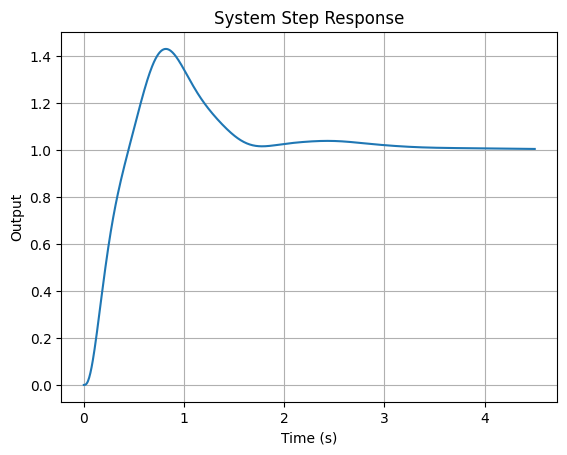

In [21]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()